In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('parsed_reviews3.csv')
df

,body,title,rating,bank_name,date
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03 12:46:11
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03 12:23:11
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03 12:12:36
...,...,...,...,...,...
92730,"30 августа обнаружила, что баланс уменьшился. ...",Банк списал деньги и теперь рекомендует их сам...,1,Совкомбанк,2022-09-02 11:47:44
92731,Обратился с вопросом (6908609) по All Airlines...,Отличная консультация от сотрудника поддержки,5,Тинькофф Банк,2022-09-02 11:46:24
92732,В августе 2021 я досрочно погасил ипотеку (кре...,Снятие обременения с квартиры,2,Россельхозбанк,2022-09-02 11:34:34
92733,9.08.22 оформлен кредит на покупку автомобиля ...,Штрафные санкции,1,Драйв Клик Банк,2022-09-02 11:28:32


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92735 entries, 0 to 92734
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   body       92735 non-null  object
 1   title      92735 non-null  object
 2   rating     92735 non-null  int64 
 3   bank_name  92735 non-null  object
 4   date       92735 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


In [60]:
df['date'] = pd.to_datetime(df['date'])

In [61]:
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')

In [62]:
df.head(5)

,body,title,rating,bank_name,date,month_year
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03 12:46:11,2023-01
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46,2023-01
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03 12:23:11,2023-01
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07,2023-01
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03 12:12:36,2023-01


In [63]:
top_5 = df.groupby(['bank_name']).agg({'body': 'count'}).sort_values(by=['body'], ascending=False).head(5)
top_5

,body
bank_name,
Тинькофф Банк,44864
Хоум Кредит Банк,9310
Совкомбанк,6111
ВТБ,3817
СберБанк,3490


In [64]:
top_5.index

Index(['Тинькофф Банк', 'Хоум Кредит Банк', 'Совкомбанк', 'ВТБ', 'СберБанк'], dtype='object', name='bank_name')

In [65]:
df_top_5 = df[df['bank_name'].isin(top_5.index)]
df_top_5

,body,title,rating,bank_name,date,month_year
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46,2023-01
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07,2023-01
6,&lt;p&gt;Самый худший банк в стране!!! Сотрудн...,Мошенники,1,ВТБ,2023-01-03 12:04:02,2023-01
8,&lt;p&gt;Мне очень понравился тинькофф и как о...,Хороший банк,5,Тинькофф Банк,2023-01-03 11:58:32,2023-01
9,"&lt;p&gt;В декабре уже было написано, что 512 ...",Глюченный банк,1,Хоум Кредит Банк,2023-01-03 11:47:17,2023-01
...,...,...,...,...,...,...
92727,"Хочу поблагодарить Тинькофф банк, а в частност...",Благодарность Тинькофф,5,Тинькофф Банк,2022-09-02 11:52:26,2022-09
92728,26.07.2022 подали заявление на субсидию 450 00...,Субсидия многодетным,1,СберБанк,2022-09-02 11:49:06,2022-09
92729,Оформил кредитную карту на сайте. Приехал в оф...,Кредитка без доступа в приложение,1,ВТБ,2022-09-02 11:48:32,2022-09
92730,"30 августа обнаружила, что баланс уменьшился. ...",Банк списал деньги и теперь рекомендует их сам...,1,Совкомбанк,2022-09-02 11:47:44,2022-09


In [87]:
top_5_rating = pd.DataFrame(df_top_5.groupby(['bank_name', 'month_year'])['rating'].mean()).reset_index()
top_5_rating

,bank_name,month_year,rating
0,ВТБ,2022-09,2.073814
1,ВТБ,2022-10,1.914620
2,ВТБ,2022-11,1.993778
3,ВТБ,2022-12,1.896052
4,ВТБ,2023-01,1.148148
5,СберБанк,2022-09,1.920000
6,СберБанк,2022-10,2.777547
7,СберБанк,2022-11,2.562708
8,СберБанк,2022-12,1.868263
9,СберБанк,2023-01,1.400000


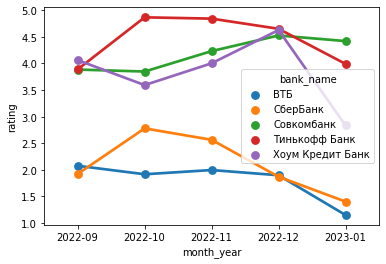

In [109]:
ax = sns.pointplot(x='month_year', y='rating', hue='bank_name', data=top_5_rating);